# Daily Financial News for 6000+ Stocks
### Sentimentanalysis-Modelling of Headlines for Stocks and there prices
@author DHR <br>

## Requirements

In [1]:
#import basic DataScience Modules
#!! for pip-modul-list to install @see requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
#import Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# import final DataSet for Modelling
data = pd.read_csv('../data/analyst_ratings_processed_final.csv')

## Check relation between Stockprice increase and Sentiment

In [4]:
def checkCorrelation(row):
    if ((row['stockPrice_Change'] != row["senti_Binary"]) and (row['stockPrice_Change'] != 0) and (row["senti_Binary"] !=0)):
        return -1
    if row['stockPrice_Change'] == row["senti_Binary"]:
        return 1
    else: return 0

In [5]:
data["correlation"] = data.apply(checkCorrelation, axis=1)

In [6]:
countRow_Pos = data[data["correlation"] == 1].shape[0]
countRow = data.shape[0]
accuracy = countRow_Pos / countRow
print("Von " + str(countRow) + " Headlines mit Sentiment-Score korrelieren " + str(countRow_Pos) +" positiv mit einem Aktienanstieg.\nDas ergbit eine Accuracy von: " + str(accuracy))

Von 161478 Headlines mit Sentiment-Score korrelieren 61517 positiv mit einem Aktienanstieg.
Das ergbit eine Accuracy von: 0.3809621124859114


In [7]:
countRow_Neg = data[data["correlation"] == -1].shape[0]
countRow = data.shape[0]
accuracy = countRow_Neg / countRow
print("Von " + str(countRow) + " Headlines mit Sentiment-Score korrelieren " + str(countRow_Neg) +" negativ mit einem Aktienanstieg.\nDas ergbit eine Accuracy von: " + str(accuracy))

Von 161478 Headlines mit Sentiment-Score korrelieren 3520 negativ mit einem Aktienanstieg.
Das ergbit eine Accuracy von: 0.02179863510818811


In [8]:
# remove the above columns from the DataFrame
data = data.drop(columns=['correlation'])

## Linear Regression

In [9]:
# Split the DataFrame in Train and Test Data
splitted_set = train_test_split(data, test_size=0.3)
train_set = splitted_set[0]
test_set = splitted_set[1]

In [10]:
# Target
Y = train_set['stockPrice_Change']
Y = np.array(list(Y))

In [11]:
# more var as X 
# train_set = train_set.assign(word_count = lambda dataframe: len(dataframe['headline_cleaned']))

#### simple Regression by senti_score

In [12]:
X_sentiScore = train_set['senti_score'] 
X_sentiScore = np.array(list(X_sentiScore)).reshape((-1, 1))

In [13]:
# Model just with senti_score
model_sentiScore = LinearRegression().fit(X_sentiScore,Y)

#### simple Regression by senti_pos_score and senti_neg_score

In [14]:
X_sentiPosNeg = train_set[['senti_pos_score', 'senti_neg_score']].values.tolist()

In [15]:
# Model with pos and neg senti
model_sentiPosNeg = LinearRegression().fit(X_sentiPosNeg,Y)

#### simple Regression by senti_pos_score and senti_neg_score and open

In [18]:
X_wOpen = train_set[['senti_pos_score', 'senti_neg_score', 'open']].values.tolist()

In [19]:
# Model with pos and neg senti
model_wOpen = LinearRegression().fit(X_wOpen,Y)

#### simple Regression by senti_pos_score and senti_neg_score and count of Publication

In [32]:
countTimer = 1
def calPublishCount(row):
    global countTimer
    count = data[(data['stock'] == row['stock']) & (data['date'] == row['date'])]['id'].count()

    #print Progress
    progress = (countTimer/161478)*100
    #sys.stdout.write("\r[ %s ]%d%%" % ('#'*(int(progress/1))+'-'*(100-int(progress/1)), progress))
    sys.stdout.write("\r[ %s ]%d%% ::: %d out of %d, id: %d: %d" % ('#'*(int(progress/1))+'-'*(100-int(progress/1)), progress, countTimer, 161478, row['id'], count))
    sys.stdout.flush()
    countTimer += 1

    return count

In [ ]:
data['publish_count'] = data.apply(calPublishCount, axis=1)
# repeat the test_train_split

In [7]:
data = pd.read_csv('../data/analyst_ratings_processed_final_count.csv')

In [16]:
X_wPublishCount = train_set[['senti_pos_score', 'senti_neg_score', 'publish_count']].values.tolist()

In [17]:
# Model with pos and neg senti
model_wPublishCount = LinearRegression().fit(X_wPublishCount,Y)

### Predict on test_set

In [ ]:
# # Make one Test Prediction
# pred = [[2.375, 0]] # must be 2D
# prediction = model.predict(pred)
# print('predicted response:', prediction, sep='\n')

In [18]:
# Prediction for the DataFrame
test_set["prediction_sentiScore"] = test_set.apply(lambda row: model_sentiScore.predict([[row['senti_score']]])[0], axis=1)

C:\Users\DOMINI~1\AppData\Local\Temp/ipykernel_6580/2035633860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["prediction_sentiScore"] = test_set.apply(lambda row: model_sentiScore.predict([[row['senti_score']]])[0], axis=1)


In [19]:
test_set["prediction_sentiPosNeg"] = test_set.apply(lambda row: model_sentiPosNeg.predict([row[['senti_pos_score', 'senti_neg_score']].values.tolist()])[0], axis=1)

C:\Users\DOMINI~1\AppData\Local\Temp/ipykernel_6580/4096235312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["prediction_sentiPosNeg"] = test_set.apply(lambda row: model_sentiPosNeg.predict([row[['senti_pos_score', 'senti_neg_score']].values.tolist()])[0], axis=1)


In [20]:
test_set["prediction_wOpen"] = test_set.apply(lambda row: model_wOpen.predict([row[['senti_pos_score', 'senti_neg_score', 'open']].values.tolist()])[0], axis=1)

C:\Users\DOMINI~1\AppData\Local\Temp/ipykernel_6580/363586911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["prediction_wOpen"] = test_set.apply(lambda row: model_wOpen.predict([row[['senti_pos_score', 'senti_neg_score', 'open']].values.tolist()])[0], axis=1)


In [21]:
test_set["prediction_wPublishCount"] = test_set.apply(lambda row: model_wPublishCount.predict([row[['senti_pos_score', 'senti_neg_score', 'publish_count']].values.tolist()])[0], axis=1)

C:\Users\DOMINI~1\AppData\Local\Temp/ipykernel_6580/1156047874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["prediction_wPublishCount"] = test_set.apply(lambda row: model_wPublishCount.predict([row[['senti_pos_score', 'senti_neg_score', 'publish_count']].values.tolist()])[0], axis=1)


In [22]:
def standardization(pred):
    pred = pred * 10
    if pred <= 0.5 and pred >= -0.5: return 0
    if pred > 0.5: return 1
    if pred < 0.5: return -1

In [23]:
# Standardization
test_set["prediction_sentiScore"] = test_set["prediction_sentiScore"].apply(standardization)
test_set["prediction_sentiPosNeg"] = test_set["prediction_sentiPosNeg"].apply(standardization)
test_set["prediction_wOpen"] = test_set["prediction_wOpen"].apply(standardization)
test_set["prediction_wPublishCount"] = test_set["prediction_wPublishCount"].apply(standardization)

C:\Users\DOMINI~1\AppData\Local\Temp/ipykernel_6580/3409748880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["prediction_sentiScore"] = test_set["prediction_sentiScore"].apply(standardization)
C:\Users\DOMINI~1\AppData\Local\Temp/ipykernel_6580/3409748880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["prediction_sentiPosNeg"] = test_set["prediction_sentiPosNeg"].apply(standardization)
C:\Users\DOMINI~1\AppData\Local\Temp/ipykernel_6580/3409748880.py:4: SettingWithCopyWarning: 


### Evaluation

In [25]:
ModelEvaluationRow = ['senti_score', 'senti_pos_score, senti_neg_score', 'with open', 'with PublishCount']
ModelEvaluationCol = ['intercept', 'slope', 'coefficient / R^2', 'accuracy', 'rmse']

ModelEvaluation_sentiScore = [model_sentiScore.intercept_, model_sentiScore.coef_, model_sentiScore.score(X_sentiScore, Y), test_set[test_set['prediction_sentiScore'] == test_set['stockPrice_Change']].shape[0]/test_set.shape[0], mean_squared_error(list(test_set['stockPrice_Change']), list(test_set['prediction_sentiScore']), squared=False)]
ModelEvaluation_sentiPosNeg = [model_sentiPosNeg.intercept_, model_sentiPosNeg.coef_, model_sentiPosNeg.score(X_sentiPosNeg, Y), test_set[test_set['prediction_sentiPosNeg'] == test_set['stockPrice_Change']].shape[0]/test_set.shape[0], mean_squared_error(list(test_set['stockPrice_Change']), list(test_set['prediction_sentiPosNeg']), squared=False)]

ModelEvaluation_wOpen = [model_wOpen.intercept_, model_wOpen.coef_, model_wOpen.score(X_wOpen, Y), test_set[test_set['prediction_wOpen'] == test_set['stockPrice_Change']].shape[0]/test_set.shape[0], mean_squared_error(list(test_set['stockPrice_Change']), list(test_set['prediction_wOpen']), squared=False)]
ModelEvaluation_wPublishCount = [model_wPublishCount.intercept_, model_wPublishCount.coef_, model_wPublishCount.score(X_wPublishCount, Y), test_set[test_set['prediction_wPublishCount'] == test_set['stockPrice_Change']].shape[0]/test_set.shape[0], mean_squared_error(list(test_set['stockPrice_Change']), list(test_set['prediction_wPublishCount']), squared=False)]

ModelEvaluation = [ModelEvaluation_sentiScore, ModelEvaluation_sentiPosNeg, ModelEvaluation_wOpen, ModelEvaluation_wPublishCount]

D:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


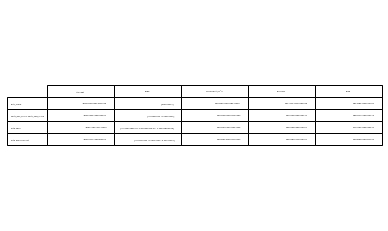

In [26]:
fig, ax = plt.subplots()

# Hide axes
fig.patch.set_visible(False)
ax.axis('off')

table = ax.table(ModelEvaluation, colLabels=ModelEvaluationCol, rowLabels=ModelEvaluationRow, loc='center')
table.set_fontsize(16)
# table.scale(1,1.5)

plt.show()

### Export Model

In [16]:
import joblib
joblib.dump(model_sentiPosNeg, './deployment/model.pkl')

['./deployment/model.pkl']